# CNV Location Visual

Here we want to create a visual to see where the respective gain and loss event are occurring. We will be using the counts tables to do so (creation of the counts tables can be found in the notebook titled "Finding Significant CNVs")

## Import necessary Librarys and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cptac
import pyensembl

In [2]:
en_counts = pd.read_csv("../count_tables/en_counts.csv", index_col=0)
gbm_counts = pd.read_csv("../count_tables/gbm_counts.csv", index_col=0)
brca_counts = pd.read_csv("../count_tables/brca_counts.csv", index_col=0)
hnscc_counts = pd.read_csv("../count_tables/hnscc_counts.csv", index_col=0)
luad_counts = pd.read_csv("../count_tables/luad_counts.csv", index_col=0)
ovarian_counts = pd.read_csv("../count_tables/ovarian_counts.csv", index_col=0)
ccrcc_counts = pd.read_csv("../count_tables/ccrcc_counts.csv", index_col=0)
colon_counts = pd.read_csv("../count_tables/colon_counts.csv", index_col=0)
lscc_counts = pd.read_csv("../count_tables/lscc_counts.csv", index_col=0)

In [3]:
ensembl = pyensembl.EnsemblRelease()

## Add Gene Location to Dataframes

In [4]:
def add_chromo_and_loc(my_dict, cancer):
    chromo = list()
    locations = list()
    not_found = list()
    count = 0
    for gene in list(my_dict.index.get_level_values(0)):
        count += 1
        try:
            e_gene = ensembl.genes_by_name(gene)
            chromo.append(e_gene[0].contig)
            locations.append((e_gene[0].start + e_gene[0].end)/2)
        except:
            not_found.append(gene)
            chromo.append(None)
            locations.append(None)
    my_dict['chromo'] = chromo
    my_dict['location'] = locations
    my_dict['cancer'] = cancer
    print(len(not_found)/count)
    return my_dict

In [5]:
luad_counts = add_chromo_and_loc(luad_counts, 'LUAD')
hnscc_counts = add_chromo_and_loc(hnscc_counts, 'HNSCC')
ovarian_counts = add_chromo_and_loc(ovarian_counts, 'OVARIAN')
gbm_counts = add_chromo_and_loc(gbm_counts, 'GBM')
lscc_counts = add_chromo_and_loc(lscc_counts, 'LSCC')
colon_counts = add_chromo_and_loc(colon_counts, 'COLON')
brca_counts = add_chromo_and_loc(brca_counts, 'BRCA')
ccrcc_counts = add_chromo_and_loc(ccrcc_counts, 'CCRCC')
en_counts = add_chromo_and_loc(en_counts, 'ENDO')

0.037577204546634144
0.019470286208123633
0.05881324318022849
0.016476616265635204
0.1323070139986038
0.1250645174097749
0.09678372446395407
0.03754213119004408
0.09352389777952026


## Subset Desired Chromsome

In [6]:
chromosome_num = '8'

In [7]:
luad_counts_8 = luad_counts[luad_counts.chromo == chromosome_num]
hnscc_counts_8 = hnscc_counts[hnscc_counts.chromo == chromosome_num]
ovarian_counts_8 = ovarian_counts[ovarian_counts.chromo == chromosome_num]
colon_counts_8 = colon_counts[colon_counts.chromo == chromosome_num]
brca_counts_8 = brca_counts[brca_counts.chromo == chromosome_num]
gbm_counts_8 = gbm_counts[gbm_counts.chromo == chromosome_num]
lscc_counts_8 = lscc_counts[lscc_counts.chromo == chromosome_num]
ccrcc_counts_8 = ccrcc_counts[ccrcc_counts.chromo == chromosome_num]
en_counts_8 = en_counts[en_counts.chromo == chromosome_num]

In [8]:
# Format for graphs
luad_counts_8 = pd.melt(luad_counts_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
hnscc_counts_8 = pd.melt(hnscc_counts_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
ovarian_counts_8 = pd.melt(ovarian_counts_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
colon_counts_8 = pd.melt(colon_counts_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
brca_counts_8 = pd.melt(brca_counts_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
gbm_counts_8 = pd.melt(gbm_counts_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
lscc_counts_8 = pd.melt(lscc_counts_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
ccrcc_counts_8 = pd.melt(ccrcc_counts_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
en_counts_8 = pd.melt(en_counts_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])

In [9]:
frames = [luad_counts_8, hnscc_counts_8, ovarian_counts_8, colon_counts_8, brca_counts_8, gbm_counts_8, lscc_counts_8, ccrcc_counts_8, en_counts_8]

## Create Visual

In [10]:
# I was not able to find a good library for creating a visual of a chromosome
# with their banding patterns, so I wrote this function to do it for me.

ideogram_data = pd.read_csv('NCBI_ideogram.csv') #cytoband infromation from NCBI
chromo8 = ideogram_data[ideogram_data['#chromosome'] == chromosome_num]
colors = []
sections = list()
for index, row in chromo8.iterrows():
  sections.append((row['bp_start'], row['bp_stop']-row['bp_start']))
  if row['stain'] == 'gneg':
    colors.append('white')
  elif row['stain'] == 'gpos':
    if row['density'] == 25.0:
      colors.append('lightgray')
    elif row['density'] == 50.0:
      colors.append('gray')
    elif row['density'] == 75.0:
      colors.append('darkgray')
    else:
      colors.append('black')
  elif row['stain'] == 'acen':
    colors.append('red')
  else:
    colors.append('lightgray')

Text(0.07, 0.5, 'Number of Samples')

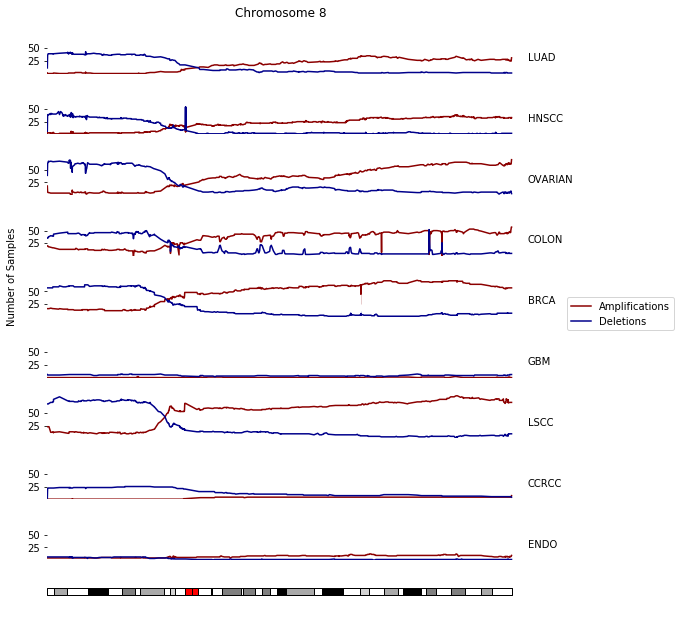

In [11]:
count = 0
end_bp = sections[len(sections) - 1][0] + sections[len(sections) - 1][1]
fig, axs = plt.subplots(nrows=10, sharex=True, sharey=True, num=0, figsize=(10,11), )
title = f'Chromosome {chromosome_num}'
fig.suptitle(title, y=0.9, x=0.45)
# plt.xlim(0,175138636)
plt.xlim(0,end_bp + (end_bp/5))
plt.ylim(0, 100)
for frame in frames:
    axs[count].get_xaxis().set_visible(False)
    axs[count].set_yticks([25,50])
    axs[count].set_frame_on(False)
#     axs[count].text(150000000, 25, frame.cancer[0])
    axs[count].text(end_bp + 5000000, 25, frame.cancer[0])
    sns.lineplot(x="location", y="value", hue="variable", palette=['darkred', 'darkblue'], data=frame, ax=axs[count], legend=False)
    if 'crossover' in frame.columns:
        axs[count].axvline(frame.crossover[0], color='black', ls='dashed')
    axs[count].set_ylabel("")
    count += 1
plt.broken_barh(sections, (50,15), facecolors=colors, edgecolor="black")
plt.axis('off')
fig.legend(labels=("Amplifications", "Deletions"), loc='center right')
fig.text(0.07, 0.5, "Number of Samples", rotation="vertical")